## Visualization of a 2d Gaussian density as a surface and contour plots 

In [1]:

import jax
import jax.numpy as jnp

try:
    import jax.scipy
except ModuleNotFoundError:
    %pip install jax.scipy
    import jax.scipy

%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from jax.scipy.stats import multivariate_normal
from jax.config import config
config.update("jax_enable_x64", True)
from matplotlib.colors import LightSource
from matplotlib import colors


try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

/home/userass/anaconda3/envs/PyroNB/lib/python3.10/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


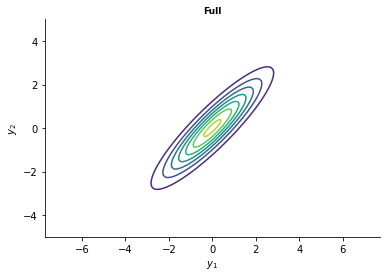

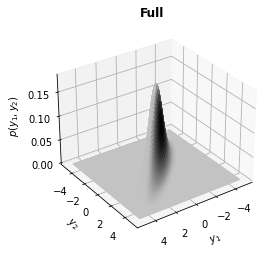

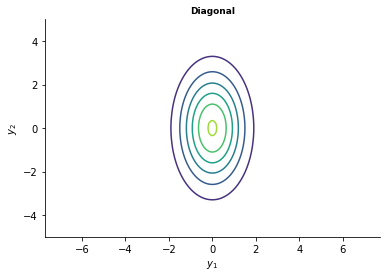

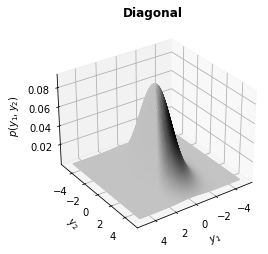

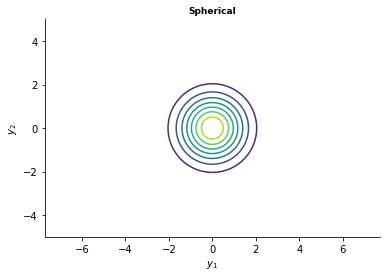

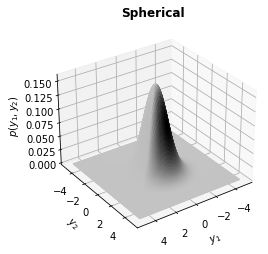

FileNotFoundError: [Errno 2] No such file or directory: 'figures/gaussPlot2dDemoContour_Colorbar.png'

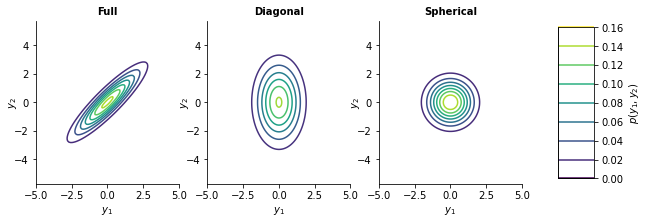

In [4]:
#### finding multivariate pdf and saving the LATEXIFY figures ####

gaussians = ["Full", "Diagonal", "Spherical"]

#Mean and Covaraince
mean = jnp.array([0, 0])
covariance = {"Full": jnp.array([[2, 1.8], [1.8, 2]]),
        "Diagonal": jnp.array([[1, 0], [0, 3]]),
        "Spherical": jnp.array([[1, 0], [0, 1]])}


#Multivariate gaussian PDF
class gaussian_pdf(object):

    def multi_normal(self, x, y, G):
        return multivariate_normal.pdf(jnp.array([x, y]), mean=mean, cov=covariance[G])

#Vectorizing 
multivariate_pdfs = gaussian_pdf()
gauss_pdf = jnp.vectorize(multivariate_pdfs.multi_normal, excluded=[2])

#Defining Meshgrid
start_point = 5
stop_point = 5
num_samples = 100
points = jnp.linspace(-start_point, stop_point, num_samples)
X, Y = jnp.meshgrid(points, points)

#contour plot
def make_contour_plot(gauss, fig=None, ax=None):
    Z =gauss_pdf(X, Y, gauss)
    if fig is None:
        fig, ax = plt.subplots()
    ax.contour(X, Y, Z)
    ax.set_xlabel('$y_1$')
    ax.set_ylabel('$y_2$')
    plt.axis('equal')
    sns.despine()
    plt.title(gauss, fontweight="bold")
    plt.draw()
    savefig('gaussPlot2dDemoContour{}_latexified'.format(gauss))
    plt.show()

#Surface plot
def make_surface_plot(gauss,fig=None, ax=None):
    Z = gauss_pdf(X, Y, gauss)
    if fig is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    ls = LightSource(azdeg=30, altdeg=55)

    cmap_color = ls.shade(np.array(Z), cmap = plt.cm.gray, blend_mode='hsv', norm=colors.PowerNorm(0))
    ax.plot_surface(X, Y, Z, antialiased=True, facecolors=cmap_color, rcount=200, ccount=200)
    ax.set_aspect('auto')
    sns.despine()
    ax.view_init(elev=30, azim=55)
    ax.set_xlabel('$y_1$')
    ax.set_ylabel('$y_2$')
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$p(y_1, y_2)$', rotation=90, labelpad = 6)
    #, labelpad=-28, rotation=10,  position=(5,-5, .16)
    plt.title(gauss, fontweight="bold")
    plt.draw()
    savefig('gaussPlot2dDemoSurf{}_latexified'.format(gauss))
    plt.show()
    
#plotting for different gaussians
for gauss in gaussians:
    latexify(width_scale_factor=3, fig_height=1.5)
    make_contour_plot(gauss, fig=None, ax=None)
    latexify(width_scale_factor=1.5, fig_height=3)
    make_surface_plot(gauss, fig=None, ax=None)


# Plotting contour subplots for colorbars
fig, axes = plt.subplots(figsize = (14,3.5), nrows=1, ncols=3)
ind = 0
for ax in axes.flat:
    gauss = gaussians[ind]
    ind += 1
    Z =gauss_pdf(X, Y, gauss)
    im = ax.contour(X, Y, Z)
    ax.axis('equal')
    ax.set_xlabel('$y_1$')
    ax.set_ylabel('$y_2$')
    ax.set_title(gauss, fontsize=9)

fig.subplots_adjust(right=0.8, hspace=0.5)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('$p(y_1, y_2)$')
sns.despine()
plt.draw()
figdir = "figures"
def save_fig(fname): plt.savefig(os.path.join(figdir, fname), dpi=1700)
save_fig('gaussPlot2dDemoContour_Colorbar')
plt.show()